# Install Libraries and Dataset Importing

In [225]:
#importing libraries

import pandas as pd 

from sklearn import preprocessing

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import tree

from sklearn import metrics

from imblearn.over_sampling import RandomOverSampler

from sklearn import svm


In [226]:
#importing the dataset
data = pd.read_csv("german credit risk1.csv")

## Data Preparation and pre-processing

In [227]:
#checking the shape of the dataset
data.shape

(5000, 21)

In [228]:
#checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [229]:
#checking how many unique values
data.nunique()

CheckingStatus                 4
LoanDuration                  59
CreditHistory                  5
LoanPurpose                   11
LoanAmount                  3354
ExistingSavings                5
EmploymentDuration             5
InstallmentPercent             6
Sex                            2
OthersOnLoan                   3
CurrentResidenceDuration       6
OwnsProperty                   4
Age                           53
InstallmentPlans               3
Housing                        3
ExistingCreditsCount           4
Job                            4
Dependents                     2
Telephone                      2
ForeignWorker                  2
Risk                           2
dtype: int64

In [230]:
#checking the duplicates values
data.duplicated().sum()

18

In [231]:
#remove the duplicates values
data=data.drop_duplicates()

In [232]:
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [233]:
#checking the messing values
data.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [234]:
# remove warnings from all code 
import warnings
warnings.filterwarnings('ignore')

### outlier 

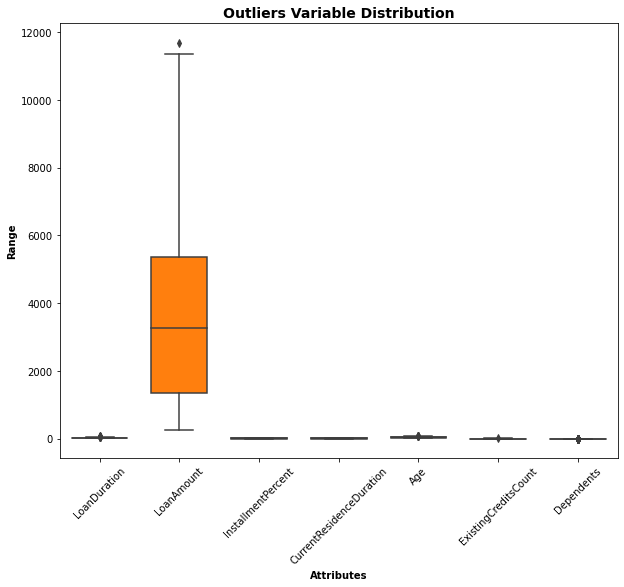

In [235]:
#checking the outliers
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data, orient="v", palette="tab10" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xticks(rotation=45)
plt.xlabel("Attributes", fontweight = 'bold');

In [236]:
#checking the statistical features of the dataset
data.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,21.455841,3491.815536,2.989562,2.859093,35.993577,1.467483,1.165195
std,11.133832,2485.122687,1.122801,1.114332,10.618910,0.565741,0.371393
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1345.500000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3250.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,30.000000,5358.750000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [237]:
#checking the names of the columns
data.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk'],
      dtype='object')

In [238]:
#getting better understanding of the dataset and knowing what are the unique values
for i in data.columns:
    print(f"{i} count : {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

CheckingStatus count : 4
['0_to_200' 'less_0' 'no_checking' 'greater_200']

LoanDuration count : 59
[31 18 15 28 32  9 16 11 35  5 27 29  4 33 39 13 34 23 10 25 20 26 21  7
 14 64  6 19 17 38  8 30 22 37 12 36 50 41 24 43 40 48 46 44 42 45 53 61
 51 63 47 54 49 60 59 56 62 57 52]

CreditHistory count : 5
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits']

LoanPurpose count : 11
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'repairs' 'radio_tv' 'business']

LoanAmount count : 3354
[1889  462  250 ... 6536 1597 4152]

ExistingSavings count : 5
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000']

EmploymentDuration count : 5
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed']

InstallmentPercent count : 6
[3 2 6 5 4 1]

Sex count : 2
['female' 'male']

OthersOnLoan count : 3
['none' 'co-applicant' 'guarantor']

CurrentResidenceDuration count : 6
[3 2 5 4 1 6]

OwnsPropert

## LABEL ENCODING

In [239]:
# label encoding for the target column
label_encoder = preprocessing.LabelEncoder()
data['Risk']= label_encoder.fit_transform(data['Risk'])
data['Risk'].unique()

array([0, 1])

In [240]:
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,0
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,0
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,0
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,1


## corrleation 

In [241]:
cor_data = data.corr()

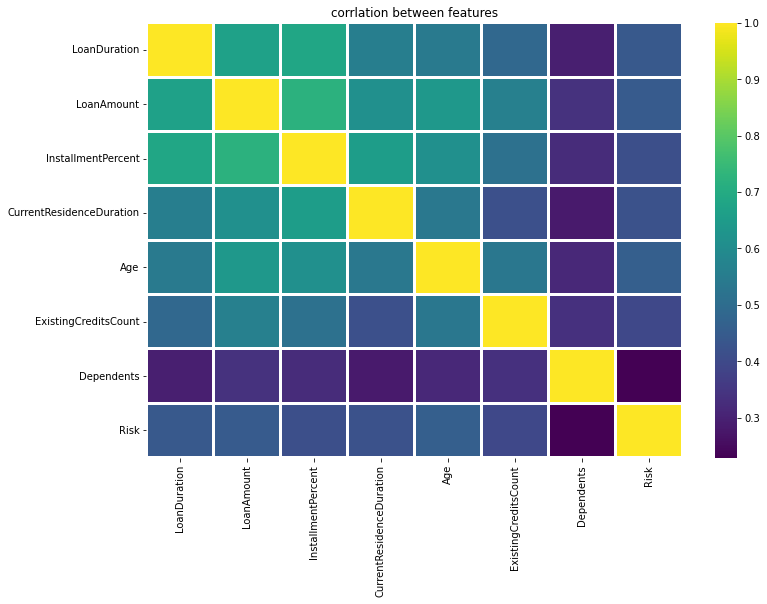

In [242]:
plt.figure(figsize=(12,8))
plt.title('corrlation between features',fontsize=12)
sns.heatmap(cor_data,linewidths=2,cmap="viridis");

-----------

In [243]:
# removing columns and add to new dataframe 
bb= aa.drop(columns=["CheckingStatus","ExistingSavings","Age" ,"Telephone"])
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   LoanDuration                          4982 non-null   int64
 1   LoanAmount                            4982 non-null   int64
 2   InstallmentPercent                    4982 non-null   int64
 3   CurrentResidenceDuration              4982 non-null   int64
 4   ExistingCreditsCount                  4982 non-null   int64
 5   Dependents                            4982 non-null   int64
 6   Risk                                  4982 non-null   int64
 7   CheckingStatus_Group_fair             4982 non-null   uint8
 8   CheckingStatus_Group_moderate         4982 non-null   uint8
 9   CheckingStatus_Group_no_checking      4982 non-null   uint8
 10  CheckingStatus_Group_rich             4982 non-null   uint8
 11  CreditHistory_all_credits_paid_back   4982 

## BUCKET 

In [244]:
# age groups labeling
data['Age_Group'] = np.nan
lst = [data]

for col in lst:
    col.loc[(col['Age'] >= 19) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
data.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,0,Adults
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,0,Young
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,0,Adults
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,1,Elder


In [245]:
# ExistingSavings groups labeling
data['ExistingSavings_Group'] = data["ExistingSavings"].map({'less_100':'little', '100_to_500':'moderate' ,"500_to_1000":"quite_rich" ,"greater_1000":'rich' })

In [246]:
# CheckingStatus groups labeling
data['CheckingStatus_Group'] = data["CheckingStatus"].map({'less_0':'fair', '0_to_200':'moderate' ,"greater_200":"rich" ,"no_checking":'no_checking' })

In [247]:
data

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,Age_Group,ExistingSavings_Group,CheckingStatus_Group
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,own,1,skilled,1,none,yes,0,Adults,moderate,moderate
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,own,2,skilled,1,none,yes,0,Adults,little,fair
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,own,2,skilled,1,yes,no,0,Young,little,fair
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,moderate
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,own,2,skilled,1,none,yes,1,Elder,quite_rich,no_checking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,...,own,1,skilled,1,none,yes,0,Adults,little,rich
4996,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,...,own,1,unemployed,1,none,yes,0,Adults,rich,moderate
4997,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,...,own,2,unskilled,2,yes,yes,1,Senior,NaN,no_checking
4998,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,...,own,1,skilled,1,none,yes,1,Young,quite_rich,moderate


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

## one hot encoding for categorical variables

In [249]:
categorical_cols = ['CheckingStatus_Group', 'CreditHistory', 'LoanPurpose', 'ExistingSavings_Group','EmploymentDuration','Sex','OthersOnLoan','OwnsProperty','InstallmentPlans','Housing','Job','ForeignWorker','Age_Group']
aa=pd.get_dummies(data, columns=categorical_cols)

aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CheckingStatus                        4982 non-null   object
 1   LoanDuration                          4982 non-null   int64 
 2   LoanAmount                            4982 non-null   int64 
 3   ExistingSavings                       4982 non-null   object
 4   InstallmentPercent                    4982 non-null   int64 
 5   CurrentResidenceDuration              4982 non-null   int64 
 6   Age                                   4982 non-null   int64 
 7   ExistingCreditsCount                  4982 non-null   int64 
 8   Dependents                            4982 non-null   int64 
 9   Telephone                             4982 non-null   object
 10  Risk                                  4982 non-null   int64 
 11  CheckingStatus_Group_fair     

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            4982 non-null   object
 1   LoanDuration              4982 non-null   int64 
 2   CreditHistory             4982 non-null   object
 3   LoanPurpose               4982 non-null   object
 4   LoanAmount                4982 non-null   int64 
 5   ExistingSavings           4982 non-null   object
 6   EmploymentDuration        4982 non-null   object
 7   InstallmentPercent        4982 non-null   int64 
 8   Sex                       4982 non-null   object
 9   OthersOnLoan              4982 non-null   object
 10  CurrentResidenceDuration  4982 non-null   int64 
 11  OwnsProperty              4982 non-null   object
 12  Age                       4982 non-null   int64 
 13  InstallmentPlans          4982 non-null   object
 14  Housing                 

## cheking the balance of data

In [251]:
X = bb.drop('Risk', axis=1)
y = bb['Risk'].values

In [252]:
pd.DataFrame(y).value_counts()

0    3312
1    1670
dtype: int64

In [253]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2 style="color:maroon"> Over sampling to the data  </h2>


In [254]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [255]:
pd.DataFrame(y_resampled).value_counts()

0    3312
1    3312
dtype: int64

## Apply PCA on the original data after daeling with the categorical variables

------

In [256]:
# This function for testing different components to each algorithm

c=[3,4,5,7,10,11,13,15,17,19,20,22,25,30]
def perform_PCA_TEST(model,X,y):
    z=[]
    for i in c:
        pca = PCA(n_components=i,random_state=0)
        PCA_data = pca.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(PCA_data,y, test_size=0.2, shuffle=True, stratify = y, random_state=0)

        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"component :{i}")
        print(classification_report(y_test,y_pred,labels=model.classes_))
        x=round(metrics.accuracy_score(y_test,y_pred),2)
        print('Accuracy Score: ',x)
        z.append(x)
         
        print("===========================")
    
    print(z)

    component = c
    accuracy = z
    
    plt.plot(component,accuracy,'b-o',label='Accuracy over number of components');
    plt.xlabel('component')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
  

----------

component :3
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       663
           1       0.71      0.74      0.73       662

    accuracy                           0.72      1325
   macro avg       0.72      0.72      0.72      1325
weighted avg       0.72      0.72      0.72      1325

Accuracy Score:  0.72
component :4
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       663
           1       0.71      0.74      0.72       662

    accuracy                           0.72      1325
   macro avg       0.72      0.72      0.72      1325
weighted avg       0.72      0.72      0.72      1325

Accuracy Score:  0.72
component :5
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       663
           1       0.71      0.73      0.72       662

    accuracy                           0.72      1325
   macro avg       0.72      0.72      0.72  

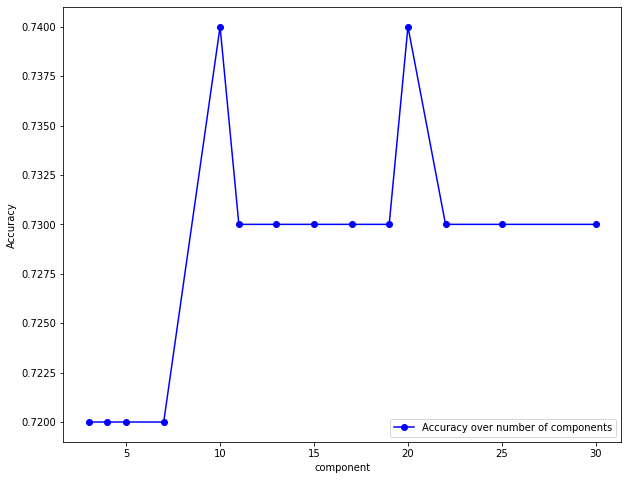

In [257]:
clf = LogisticRegression(random_state=42).fit(X, y)

perform_PCA_TEST(clf,X_resampled, y_resampled)


----------

-------

component :3
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       663
           1       0.75      0.89      0.82       662

    accuracy                           0.80      1325
   macro avg       0.81      0.80      0.80      1325
weighted avg       0.81      0.80      0.80      1325

Accuracy Score:  0.8
component :4
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       663
           1       0.76      0.90      0.82       662

    accuracy                           0.81      1325
   macro avg       0.82      0.81      0.81      1325
weighted avg       0.82      0.81      0.81      1325

Accuracy Score:  0.81
component :5
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       663
           1       0.76      0.89      0.82       662

    accuracy                           0.81      1325
   macro avg       0.81      0.81      0.80   

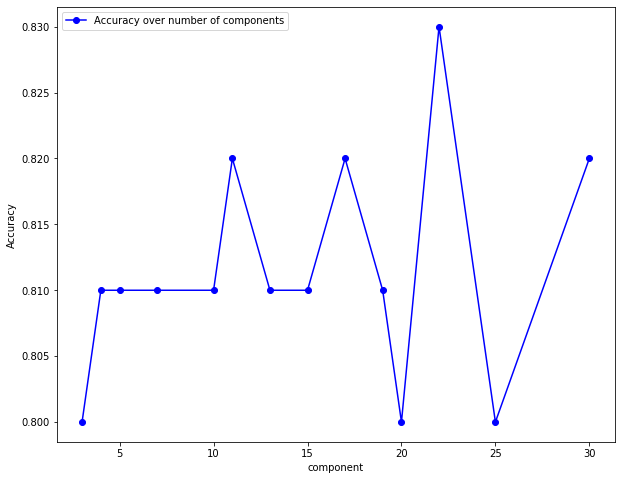

In [258]:
dt = tree.DecisionTreeClassifier(random_state=42)
perform_PCA_TEST(dt,X_resampled, y_resampled)

component :3
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       663
           1       0.70      0.70      0.70       662

    accuracy                           0.70      1325
   macro avg       0.70      0.70      0.70      1325
weighted avg       0.70      0.70      0.70      1325

Accuracy Score:  0.7
component :4
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       663
           1       0.71      0.71      0.71       662

    accuracy                           0.71      1325
   macro avg       0.71      0.71      0.71      1325
weighted avg       0.71      0.71      0.71      1325

Accuracy Score:  0.71
component :5
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       663
           1       0.74      0.70      0.72       662

    accuracy                           0.73      1325
   macro avg       0.73      0.73      0.73   

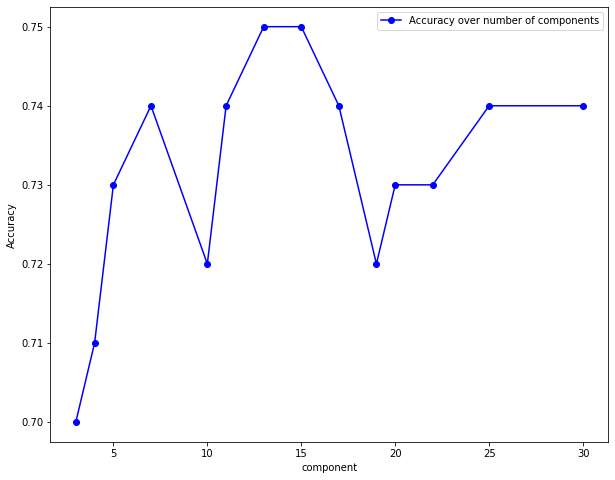

In [259]:
knn = KNeighborsClassifier(n_neighbors=8)
perform_PCA_TEST(knn,X_resampled, y_resampled)

component :3
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       663
           1       0.70      0.75      0.72       662

    accuracy                           0.71      1325
   macro avg       0.71      0.71      0.71      1325
weighted avg       0.71      0.71      0.71      1325

Accuracy Score:  0.71
component :4
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       663
           1       0.69      0.77      0.73       662

    accuracy                           0.72      1325
   macro avg       0.72      0.72      0.71      1325
weighted avg       0.72      0.72      0.71      1325

Accuracy Score:  0.72
component :5
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       663
           1       0.72      0.72      0.72       662

    accuracy                           0.72      1325
   macro avg       0.72      0.72      0.72  

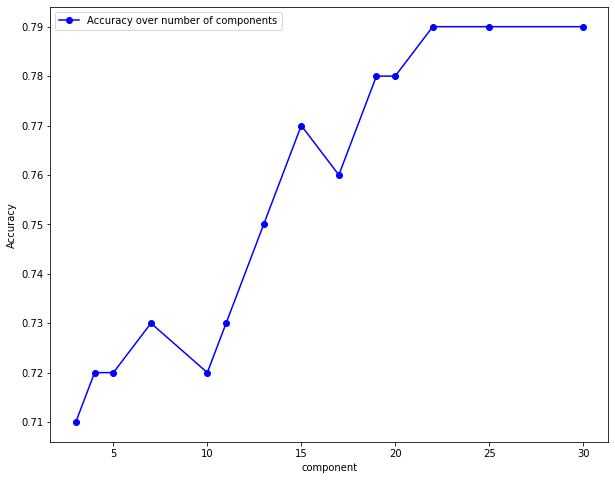

In [260]:
svm = svm.SVC()
perform_PCA_TEST(svm,X_resampled, y_resampled)

component :3
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       663
           1       0.78      0.91      0.84       662

    accuracy                           0.83      1325
   macro avg       0.84      0.83      0.82      1325
weighted avg       0.84      0.83      0.82      1325

Accuracy Score:  0.83
component :4
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       663
           1       0.78      0.91      0.84       662

    accuracy                           0.82      1325
   macro avg       0.83      0.82      0.82      1325
weighted avg       0.83      0.82      0.82      1325

Accuracy Score:  0.82
component :5
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       663
           1       0.81      0.90      0.86       662

    accuracy                           0.85      1325
   macro avg       0.85      0.85      0.85  

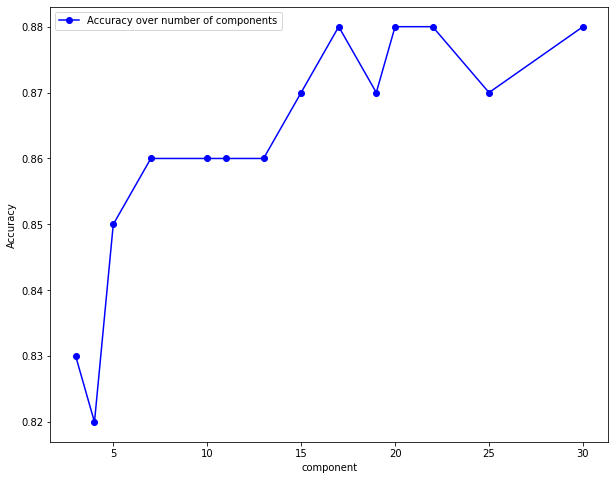

In [261]:
clf=RandomForestClassifier( n_estimators= 80 , random_state= 42)
perform_PCA_TEST(clf,X_resampled, y_resampled)

-------------------------------

<h2 style="color:maroon"> Apply PCA with best number of components  </h2>

In [262]:
pca = PCA(n_components=17,random_state=42)
PCA_data = pca.fit_transform(X_resampled)

<h2 style="color:maroon"> split the data to train , test  </h2>

In [263]:
X_train, X_test, y_train, y_test = train_test_split(PCA_data, y_resampled, test_size=0.2, shuffle=True, stratify = y_resampled, random_state=0)


<h2 style="color:maroon"> Standardize features by removing the mean and scaling to unit variance  </h2>



In [264]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

----------

# champion model

In [271]:
clf=RandomForestClassifier(n_estimators=80 , random_state= 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

a=round(metrics.accuracy_score(y_test,y_pred),2)
print('Accuracy Score: ',a)
print()
print(classification_report(y_test,y_pred,labels=clf.classes_))

Accuracy Score:  0.88

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       663
           1       0.85      0.91      0.88       662

    accuracy                           0.88      1325
   macro avg       0.88      0.88      0.88      1325
weighted avg       0.88      0.88      0.88      1325



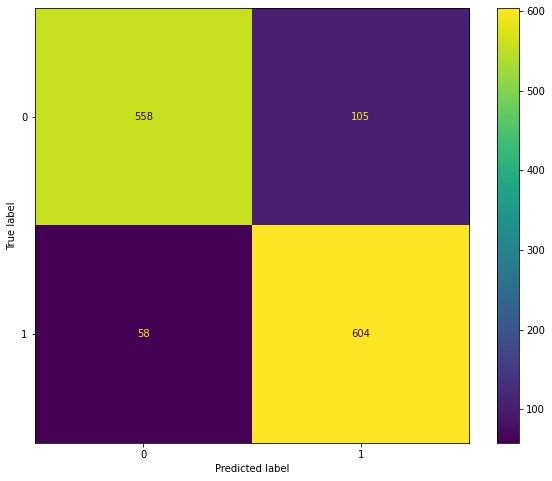

In [266]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

--------

In [267]:
import openpyxl as xls

In [268]:
excel = pd.ExcelWriter("G3.credit_risk.xlsx")

In [269]:
data.to_excel(excel)

In [270]:
excel.save()